# **Jacob Shearer - Excercise Set 3**

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import random

**Question 1:**

In [2]:
random.seed(1)

def monte_carlo_int(a, b, N, function, weight_function=None, inverted_function = None):
    total_sum = 0
    total_sum_squared = 0
    for i in range(N):
        if weight_function is not None and inverted_function is not None:
            y = random.uniform(inverted_function(a), inverted_function(b))
            x = inverted_function(y)
            result = function(x)/weight_function(x)
        else:
            result = function(random.uniform(a, b))
            
        total_sum += result
        total_sum_squared += result**2
    
    result = (total_sum/N)*(b-a)
    uncertainty = np.sqrt(((total_sum_squared)/N - (total_sum/N)**2)/N)
    return result, uncertainty

$$\int_{0}^{\pi}\sin x dx = 2$$

In [3]:
# Part (a):
print('Part (a):')
integrand = lambda x: np.sin(x)
N_array = np.array([10, 50, 100, 500, 1000, 5000, 10000])
estimated_uncertainty = np.array([])
for N in N_array:
    result, uncertainty = monte_carlo_int(0, np.pi, N, integrand)
    estimated_uncertainty = np.append(estimated_uncertainty, uncertainty)
    print(f'For N = {N}:')
    print(f'     Integral = {result} ± {uncertainty}')
    print(f'     Result differs from the analytic solution by {np.abs(2-result)}')
    print('\n')

Part (a):
For N = 10:
     Integral = 1.9278903944834764 ± 0.09076988624441155
     Result differs from the analytic solution by 0.07210960551652357


For N = 50:
     Integral = 1.9532280674906985 ± 0.045542697400832055
     Result differs from the analytic solution by 0.04677193250930145


For N = 100:
     Integral = 2.0688297079086335 ± 0.03195280553531656
     Result differs from the analytic solution by 0.06882970790863352


For N = 500:
     Integral = 2.007992024813798 ± 0.013534346358872624
     Result differs from the analytic solution by 0.007992024813797904


For N = 1000:
     Integral = 2.0051993213032344 ± 0.00990350477547806
     Result differs from the analytic solution by 0.0051993213032344165


For N = 5000:
     Integral = 1.9899154327843276 ± 0.004377266510546889
     Result differs from the analytic solution by 0.010084567215672413


For N = 10000:
     Integral = 1.9912489459815155 ± 0.003099537492201844
     Result differs from the analytic solution by 0.0087510

Part (b):


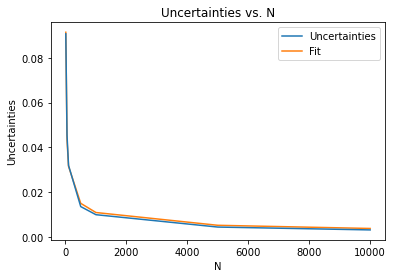

Fit exponent: -0.4624547867400227
Judging by the plot and the fit, it appears that the estimated error scales as N^-1/2.


In [4]:
# Part(b):
print('Part (b):')
plt.plot(N_array, estimated_uncertainty, label='Uncertainties', zorder=1)
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')

fit_function = lambda x, a, b: a*x**b
params, cov = scipy.optimize.curve_fit(fit_function, N_array, estimated_uncertainty)
plt.plot(N_array, params[0]*N_array**params[1], label='Fit', zorder=0)

plt.legend()
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')
plt.show()

print(f'Fit exponent: {params[1]}')
print('Judging by the plot and the fit, it appears that the estimated error scales as N^-1/2.')

Part (c):


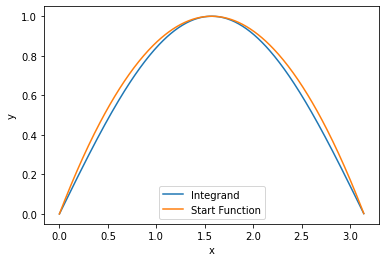

In [5]:
# Part (c):
print ('Part (c):')
x = np.arange(0,np.pi, 0.01)
start_function = lambda t: (4/(np.pi**2)) * t * (np.pi - t)
plt.plot(x, np.sin(x), label='Integrand')
plt.plot(x, start_function(x), label='Start Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The function $ y(x) = \frac{4}{\pi^2}x(\pi-x)$  very closely matches the integrand on the interval $[0, \pi]$, so we'll start there.
<br/>
The function must be normalized first, i.e.
    $$ \int_{0}^{\pi}c\frac{4}{\pi^2}x(\pi-x) dx = 1 $$
where $c$ is a normalization constant. Solving this, we get:
    $$ c \cdot \frac{2\pi}{3} = 1$$
so $c=\frac{3}{2\pi}$, which makes our weight function
    $$ w(x) = \frac{6}{\pi^3}x(\pi-x)$$
<br/>
Integrating $w(t)$ from $0$ to $x$, we end up with:
    $$ y(x) = \int_{0}^{x}\frac{6}{\pi^3}t(\pi-t) dt = \frac{6}{\pi^3}(\frac{\pi x^2}{2} - \frac{x^3}{3})$$
And finally, inverting $y(x)$ gives us $y^{-1}(x)$:
    $$ y^{-1}(x) = \frac{1}{2}(\pi a + \frac{\pi}{a} + \pi) $$
where
    $$ a = \sqrt[3]{2\sqrt{y^2 + y} - 2y + 1}$$

In [6]:
inverted_function = lambda y: (1/2) * (np.pi*(np.cbrt((2*np.sqrt(y**2 + y)) - (2*y) + 1)) + 
                    np.pi/(np.cbrt((2*np.sqrt(y**2 + y)) - (2*y) + 1)) + np.pi)
weight_function = lambda x: (6/np.pi**3)*x*(np.pi-x)
estimated_uncertainty = np.array([])
for N in N_array:
    result, uncertainty = monte_carlo_int(0, np.pi, N, integrand, weight_function, inverted_function)
    estimated_uncertainty = np.append(estimated_uncertainty, uncertainty)
    print(f'For N = {N}:')
    print(f'     Integral = {result} ± {uncertainty}')
    print(f'     Result differs from the analytic solution by {np.abs(2-result)}')
    print('\n')

For N = 10:
     Integral = 2.048408095016705 ± 4.790245327270383e-06
     Result differs from the analytic solution by 0.048408095016704955


For N = 50:
     Integral = 2.048419014015782 ± 2.0649410137327605e-06
     Result differs from the analytic solution by 0.04841901401578186


For N = 100:
     Integral = 2.048408935414266 ± 1.3910569186684588e-06
     Result differs from the analytic solution by 0.04840893541426583


For N = 500:
     Integral = 2.0484144761963563 ± 6.288174379842453e-07
     Result differs from the analytic solution by 0.048414476196356304


For N = 1000:
     Integral = 2.048417242008901 ± 4.494412912748767e-07
     Result differs from the analytic solution by 0.048417242008901074


For N = 5000:
     Integral = 2.048416707870736 ± 1.9720731217315603e-07
     Result differs from the analytic solution by 0.04841670787073582


For N = 10000:
     Integral = 2.048416236046823 ± 1.4234017855092915e-07
     Result differs from the analytic solution by 0.048416236

Part (d):


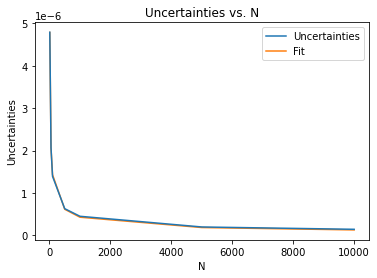

Fit exponent: -0.5245563284361131
Just like in part b) the calculated uncertainty seems to go as N^-1/2. However, it also starts much lower 
(i.e. fewer points N are required to get a more accurate value).


In [7]:
# Part(d):
print('Part (d):')
plt.plot(N_array, estimated_uncertainty, label='Uncertainties', zorder=1)
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')

fit_function = lambda x, a, b: a*x**b
params, cov = scipy.optimize.curve_fit(fit_function, N_array, estimated_uncertainty)
plt.plot(N_array, params[0]*N_array**params[1], label='Fit', zorder=0)

plt.legend()
plt.title('Uncertainties vs. N')
plt.xlabel('N')
plt.ylabel('Uncertainties')
plt.show()

print(f'Fit exponent: {params[1]}')
print('''Just like in part b) the calculated uncertainty seems to go as N^-1/2. However, it also starts much lower 
(i.e. fewer points N are required to get a more accurate value).''')

**Question 2:**

In [8]:
def von_neumann_integration(a, b, N, function, weight_function, smallest_value, largest_value):
    total_sum = 0.0
    total_sum_squared = 0.0
    number_accepted = 0
    while number_accepted < N:
        x = random.uniform(a, b)
        y = random.uniform(smallest_value, largest_value)
        if y < weight_function(x):
            integrand = function(x)/weight_function(x)
            total_sum += integrand
            total_sum_squared += integrand**2
            number_accepted += 1
    
    result = (total_sum/N)*(b-a)
    uncertainty = np.sqrt(((total_sum_squared/N) - (total_sum/N)**2)/N)
    return result, uncertainty

Part (a):
$$\int_{1}^{2} x^2 dx = \frac{7}{3}$$

To use the original function as a weight, we would need a normalization constant of $c = \frac{3}{7}$
$$ w(x) = \frac{3}{7} x^2$$
Which has a maximum value of $\frac{12}{7}$ at $x = 2$.

In [9]:
function = lambda x: x**2
weight = lambda x: (3/7) * x**2
result, uncertainty = von_neumann_integration(1, 2, 80, function, weight,1 , 12/7)
print(f'The result of the integration is {result} ± {uncertainty}')
print(f'This differs from the analytic result by {np.abs(7/3-result)}')

The result of the integration is 2.333333333333335 ± 3.332000937312528e-09
This differs from the analytic result by 1.3322676295501878e-15


Part (b):
$$\int_{0}^{1} 4\sqrt{1-x^2} dx = \pi$$
To use the original function as a weight, we would need a normalization constant of $c = \frac{1}{\pi}$
$$ w(x) = \frac{4}{\pi} \sqrt{1-x^2}$$
Which has a maximuum value of $\frac{4}{\pi}$ at $x = 0$.

In [10]:
function = lambda x: 4*np.sqrt(1-x**2)
weight = lambda x: 4/np.pi*np.sqrt(1-x**2)
result, uncertainty = von_neumann_integration(0, 1, 100, function, weight, 0, 4/np.pi)
print(f'The result of the integration is {result} ± {uncertainty}')
print(f'This differs from the analytic result by {np.abs(np.pi-result)}')

The result of the integration is 3.141592653589788 ± 9.424321830774484e-09
This differs from the analytic result by 5.329070518200751e-15


Part (c):
$$\int_{-1}^{1} x^3 dx = 0$$
which makes it impossible to normalize the original function and use it as a weight.
Instead, we're going to split up the integral into two regions ($[-1,0]$ and $[0,1]$) and just add the final results.
<br/>
<br/>
For $[0, 1]$,
$$\int_{0}^{1} x^3 dx = 1$$
making $w(x) = f(x)$, and possible randomly-generated y-values in the range $[0,1]$.
<br/>
<br/>
For $[-1, 0]$,
$$\int_{-1}^{0} x^3 dx = -1$$
giving us a normalization constant $c$ of $-1$. Therefore,
$$w(x) = -x^3$$
and with possible randomly-generated y-values in the range $[-1,0]$, the opposite of above.
<br/>
<br/>
Finally, Because we'll be adding the final results of these two separate integrals ($I = I_1 + I_2$), their total uncertainty is given by the following error propagation formula:
$$\sigma_{I} = \sqrt{(\frac{\partial I}{\partial I_1} \sigma_{I_1})^2 + (\frac{\partial I}{\partial I_2} \sigma_{I_2})^2} $$
<br/>
$$= \sqrt{\sigma_{I_1}^2 + \sigma_{I_2}^2}$$

In [11]:
# Part (c):
print('Part (c):')
function = lambda x: x**3
weight1 = lambda x: -x**3
weight2 = function
result1, uncertainty1 = von_neumann_integration(-1, 0, 100, function, weight1, -1, 0)
result2, uncertainty2 = von_neumann_integration(0, 1, 100, function, weight2, 0, 1)
result = result1 + result2
uncertainty = np.sqrt(uncertainty1**2 + uncertainty2**2)
print(f'The result of the integration is {result} ± {uncertainty}')
print(f'This differs from the analytic result by {np.abs(0-result)}')

Part (c):
The result of the integration is 0.0 ± 0.0
This differs from the analytic result by 0.0


**Question 3:**

In [12]:
def positive_or_negative(): # Returns either negative or positive one
    number = random.uniform(-1, 1)
    if number < 0:
        return number/(-1*number)
    else:
        return number/number

def two_d_random_walk(step_num, wall_thickness):
    current_x = 0.0
    current_y = 0.0
    all_x = np.array([-1.0, 0.0])
    all_y = np.array([0.0, 0.0])
    num_steps_taken = 0
    escaped = False
    while num_steps_taken < step_num:
        if num_steps_taken == 0: #Incident Beam
            current_x = 1.0
            current_y = 0.0
        else:
            new_x_dir = random.uniform(-1, 1)
            new_y_dir = (1-new_x_dir**2)*positive_or_negative() # Neutrons will always travel 1 unit
            current_x += new_x_dir
            current_y += new_y_dir
        
        all_x = np.append(all_x, current_x)
        all_y = np.append(all_y, current_y)
        num_steps_taken += 1
        if current_x > wall_thickness:
            escaped = True
            break
        elif current_x < 0:
            escaped = False
            break
        
    return all_x, all_y, escaped

In [13]:
# Part(a):
print('Part (a):')
num_escaped = 0
escaped_y_coords = np.array([])
trials = 100000
for i in range(trials):
    x_coords, y_coords, escaped = two_d_random_walk(15, 5)
    if escaped:
        num_escaped += 1
        escaped_y_coords = np.append(escaped_y_coords, y_coords[-1])

print(f'''Data from 100000 random walk trials indicate that a neutron has a {num_escaped/100000}% probability 
of getting through the wall.''')
print('Lead is apparently very good at shielding the neutrons.')

Part (a):
Data from 100000 random walk trials indicate that a neutron has a 0.04703% probability 
of getting through the wall.
Lead is apparently very good at shielding the neutrons.


Part (b):


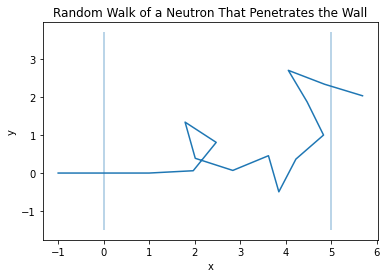

In [26]:
# Part(b):
print('Part (b):')
for i in range(trials):
    x_coords, y_coords, escaped = two_d_random_walk(15, 5)
    if escaped:
        break

plt.plot(x_coords, y_coords)
plt.vlines([0, 5], np.amin(y_coords)-1, np.amax(y_coords)+1, alpha=0.4) # The boundaries of the wall
plt.title('Random Walk of a Neutron That Penetrates the Wall')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Part (c):


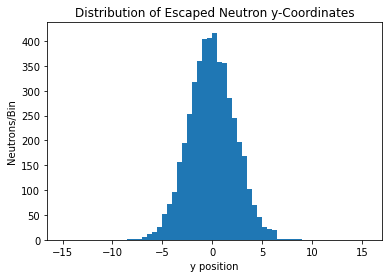

In [15]:
# Part(c):
print('Part (c):')
bins = np.arange(-15, 16, 0.5)
plt.hist(escaped_y_coords, bins=bins)
plt.title('Distribution of Escaped Neutron y-Coordinates')
plt.xlabel('y position')
plt.ylabel('Neutrons/Bin')
plt.show()

This distribution looks like a Gaussian centered around y = 0. This makes sense: the neutrons all start at y = 0, and the scattering probability in $\theta$ (and therefore the probability that a neutron will be scattered in the ± y-direction) is uniform, meaning that they should end up on either side of the x-axis about equally.

**Question 4:**

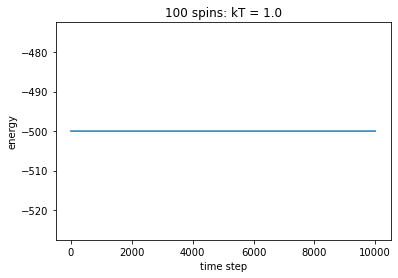

In [30]:
# Code from lecture:
# Ising model implementation with Metropolis algorithm
# Based on IsingViz.py from Landau, et al.

N     = 100                 # number of spin sites                                     
B     = 0.                 # magnetic field                               
mu    = .33                # g mu (not needed if B=0)
J     = 5.                 # exchange energy                              
k     = 1.                 # Boltzmann constant
T     = 1.                 # temperature                                 
state = np.zeros(N)        # spin states: up(1), down (-1)
random.seed() 
        
def energy(S):                                  
    FirstTerm = 0.
    SecondTerm = 0.                                          
    for i in range(0,N-1):  
        FirstTerm += -J * S[i]*S[i+1]
    FirstTerm += -J * S[N-1]*S[0]     # periodic boundary 
    for i in range(0,N):   
        SecondTerm += -mu*S[i]*B
    return (FirstTerm + SecondTerm); 

for i in range(0 ,N):  
    state[i] = -1.          # Initial spins all down (cold start)  

ES = energy(state)
    
num_steps = 100*N
energy_values = []
step_index_values = []
for istep in range(num_steps):
    test_state = list(state)
    random_site = int(N*random.random())
    test_state[random_site] *= -1.   # Trial step: flip spin at one random site
    ET = energy(test_state)
    R = np.exp((ES-ET)/(k*T))           # Boltzmann test
    #print(ES, ET, k*T, R)
    if R > random.random():
        state = test_state
        ES = ET
    # else nothing (we remain in the same state as before)
    
    energy_values.append(ES)
    step_index_values.append(istep)
    row = ''
    for site in state:
        if site==1.0:
            row += 'X'
        else:
            # fancy codes for red O's
            row += '\x1b[31mO\x1b[0m'
    #print(row)
    
plt.plot(step_index_values, energy_values)
plt.xlabel('time step')
plt.ylabel('energy')
plt.title('%d spins: kT = %.1f' % (N, k*T))
plt.show()